# Домашнее задание: модели классификации и оценка их качества.

Будем тренироваться обучать модели классификации и интерпретировать их качество.

## Часть 1. Обучение моделей классификации (5 баллов). 

Поработайте с датасетом telecom_churn. Вам предстоит по характеристикам клиента предсказать, уйдет он или нет (целевая колонка - Churn).

A. Решите задачу с помощью логистической регрессии:
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

B. Решите задачу с помощью метода опорных векторов (с kernel = 'linear'):
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

Не забудьте масштабировать данные перед применением линейных моделей.

C. Попробуйте увеличить число признаков с помощью добавления полиномиальных признаков. Также можно добавить функции от признаков вручную (те, которые вам кажутся подходящими в данной задаче).
Улучшилось ли качество алгоритма?

D. Постройте матрицу корреляций признаков. Есть ли признаки, которые практически не коррелируют с целевой переменной? Попробуйте их удалить. Есть ли пары сильно коррелирующих между собой признаков? Удалите по одному признаку из каждой пары.
Помогло ли это улучшить качество в данной задаче?

Пункты C и D можно скомбинировать для достижения наилучшего качества.

E. Сделайте мини-отчет о проведенной работе. Для этого ответьте на вопросы:
a) какой классификатор дал наилучший результат? чему равны значения метрик accuracy, f1-score и ROC-AUC? 
(Вы можете изначально разбить данные на train и test и сравнивать значения метрик на этих выборках; или же можно оценивать качество алгоритмов по кросс-валидации).

b) какие новые признаки вы добавили и какие признаки удалили?

c) удалось ли добиться того, что алгоритм не переобучился и не недообучился?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Ваш отчет здесь.

## Часть 2. Оценка качества моделей классификации (5 баллов).

* Колонки 0, 1, ..., 13 - анонимизированные характеристики клиентов (некоторые числовые, некоторые категориальные). 
* Target - целевая переменная: 1 - выдать кредит, 0 - не выдать кредит.

На этих данных было обучено три различных алгоритма классификации и получены предсказания:
* pred1_probs - предсказанные вероятности положительного класса, полученные алгоритмом 1.
* pred1_classes - предсказанные алгоритмом 1 классы
* pred2_probs, pred2_classes, pred3_probs, pred3_classes - аналогичные величины для алгоритмов 2 и 3

Наша задача - оценить качество каждого из трех алгоритмов и разобраться, какой из алгоритмов лучше всего работает в данной задаче.

In [4]:
df = pd.read_csv("credit_scoring_example1.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,target,pred1_probs,pred1_classes,pred2_probs,pred2_classes,pred3_probs,pred3_classes
0,1,22.08,11.46,2,4,4,1.585,0,0,0,...,2,100,1213,0,0.506772,1,0.610853,1,0.375494,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,...,2,160,1,0,0.358519,0,0.185941,0,0.200975,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,...,2,280,1,0,0.358753,0,0.523009,1,0.160465,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,...,2,0,1,1,0.408729,0,0.185941,0,0.357771,0
4,1,20.17,8.17,2,6,4,1.960,1,1,14,...,2,60,159,1,0.480904,0,0.526646,1,0.260169,0


In [5]:
df.shape

(689, 21)

**Задание 1.** Проверьте target на сбалансированность по классам, сделайте вывод.

In [13]:
target_counts = df['target'].value_counts()

print("Количество элементов в каждом классе:")
print(target_counts)

is_balanced = target_counts[0] == target_counts[1]
print("Целевая переменная сбалансирована:", is_balanced)


Количество элементов в каждом классе:
target
0    382
1    307
Name: count, dtype: int64
Целевая переменная сбалансирована: False


**Задание 2.** Вычислите accuracy - долю правильных ответов каждого из алгоритмов. Какой алгоритм имеет наибольшую accuracy?

In [7]:

from sklearn.metrics import accuracy_score

true_values = df['target']

pred1_classes = df['pred1_classes']
pred2_classes = df['pred2_classes']
pred3_classes = df['pred3_classes']

accuracy1 = accuracy_score(true_values, pred1_classes)
accuracy2 = accuracy_score(true_values, pred2_classes)
accuracy3 = accuracy_score(true_values, pred3_classes)

print(f"Algorithm 1 Accuracy: {accuracy1:.2%}")
print(f"Algorithm 2 Accuracy: {accuracy2:.2%}")
print(f"Algorithm 3 Accuracy: {accuracy3:.2%}")


'''
Algorithm 1 Accuracy: 66.18%
Algorithm 2 Accuracy: 67.20%
Algorithm 3 Accuracy: 64.01%

Из результатов видно, что алгоритм 2 имеет наибольшую accuracy среди трех рассмотренных.
'''

Algorithm 1 Accuracy: 66.18%
Algorithm 2 Accuracy: 67.20%
Algorithm 3 Accuracy: 64.01%


'\nAlgorithm 1 Accuracy: 66.18%\nAlgorithm 2 Accuracy: 67.20%\nAlgorithm 3 Accuracy: 64.01%\n\nИз результатов видно, что алгоритм 2 имеет наибольшую accuracy среди трех рассмотренных.\n'

**Задание 3.** Теперь вычислите точность и полноту каждого из алгоритмов.

In [8]:
import pandas as pd
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

true_values = df['target']

pred1_classes = df['pred1_classes']
pred2_classes = df['pred2_classes']
pred3_classes = df['pred3_classes']

precision1 = precision_score(true_values, pred1_classes)
recall1 = recall_score(true_values, pred1_classes)

precision2 = precision_score(true_values, pred2_classes)
recall2 = recall_score(true_values, pred2_classes)

precision3 = precision_score(true_values, pred3_classes)
recall3 = recall_score(true_values, pred3_classes)

print(f"Algorithm 1 Precision: {precision1:.2%}, Recall: {recall1:.2%}")
print(f"Algorithm 2 Precision: {precision2:.2%}, Recall: {recall2:.2%}")
print(f"Algorithm 3 Precision: {precision3:.2%}, Recall: {recall3:.2%}")

'''
Algorithm 1 Precision: 69.07%, Recall: 43.65%
Algorithm 2 Precision: 61.04%, Recall: 72.96%
Algorithm 3 Precision: 69.03%, Recall: 34.85%
'''


Algorithm 1 Precision: 69.07%, Recall: 43.65%
Algorithm 2 Precision: 61.04%, Recall: 72.96%
Algorithm 3 Precision: 69.03%, Recall: 34.85%


'\nAlgorithm 1 Precision: 69.07%, Recall: 43.65%\nAlgorithm 2 Precision: 61.04%, Recall: 72.96%\nAlgorithm 3 Precision: 69.03%, Recall: 34.85%\n'

Самым полезным инструментом в практических задачах является ***матрица ошибок***. Смотря на неё и регулируя порог, определяющий классы, мы можем достичь оптимального решения нашей задачи.

**Задание 4.** Используя функцию plot_confusion_matrix для визуализации матрицы ошибок, нарисуйте матрицы ошибок всех трех алгоритмов.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

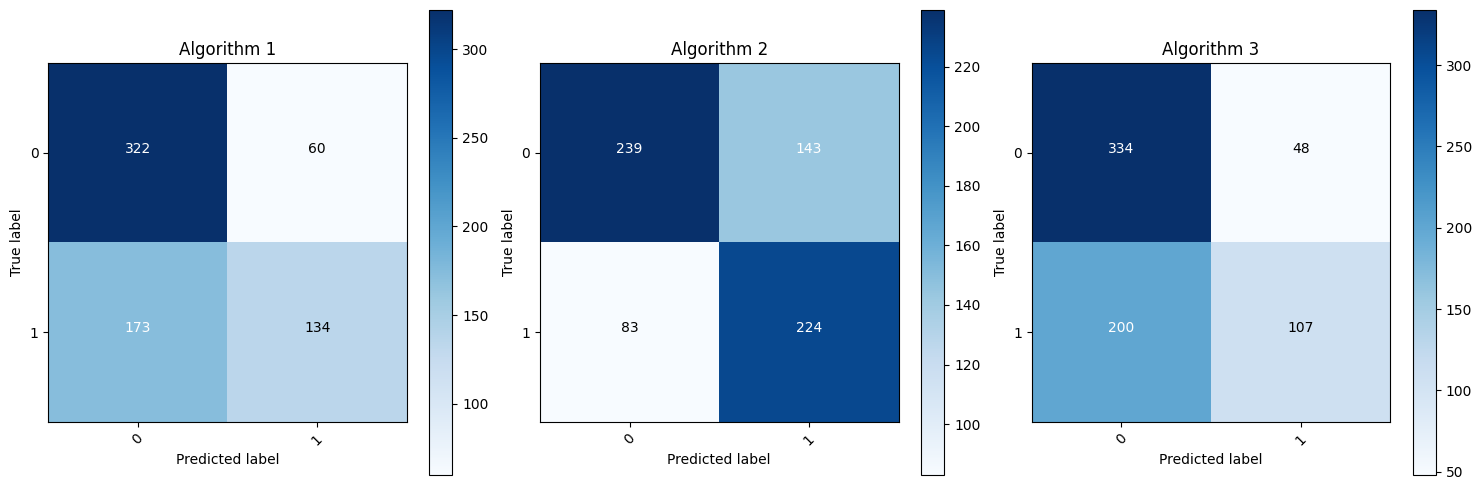

In [10]:
cm1 = confusion_matrix(true_values, pred1_classes)
cm2 = confusion_matrix(true_values, pred2_classes)
cm3 = confusion_matrix(true_values, pred3_classes)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plot_confusion_matrix(cm1, classes=['0', '1'], title='Algorithm 1')

plt.subplot(1, 3, 2)
plot_confusion_matrix(cm2, classes=['0', '1'], title='Algorithm 2')

plt.subplot(1, 3, 3)
plot_confusion_matrix(cm3, classes=['0', '1'], title='Algorithm 3')

plt.show()


Давайте определимся с целями нашего предсказания:
    
* **Вариант 1**: хотим выдать кредит максимальному числу людей среди тех, кто мог бы его вернуть. При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того полнота должна быть как можно больше (число в левом нижнем квадрате матрицы ошибок минимально).

**Задание 5.** Для каждого алгоритма найдите такой порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной полноты можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65?

**Комментарий:** порог можно искать в цикле с небольшим шагом.

In [11]:
true_values = df['target']
def find_optimal_threshold(y_true, pred_probs, min_accuracy=0.65):
    thresholds = np.arange(0, 1.01, 0.01)
    best_threshold = 0
    best_accuracy = 0
    best_recall = 0

    for threshold in thresholds:
        pred_classes = (pred_probs >= threshold).astype(int)
        cm = confusion_matrix(y_true, pred_classes)
        accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
        recall = cm[1, 1] / np.sum(cm[1, :])

        if accuracy >= min_accuracy and recall > best_recall:
            best_threshold = threshold
            best_accuracy = accuracy
            best_recall = recall

    return best_threshold, best_accuracy, best_recall

algorithms = ['1', '2', '3']

for algorithm in algorithms:
    target_col = 'target'
    pred_probs_col = f'pred{algorithm}_probs'

    threshold, accuracy, recall = find_optimal_threshold(df[target_col], df[pred_probs_col])

    print(f"\nFor Algorithm {algorithm}:")
    print(f"Optimal Threshold: {threshold}")
    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}")



For Algorithm 1:
Optimal Threshold: 0.36
Accuracy: 0.6516690856313497
Recall: 0.742671009771987

For Algorithm 2:
Optimal Threshold: 0.27
Accuracy: 0.6748911465892597
Recall: 0.8371335504885994

For Algorithm 3:
Optimal Threshold: 0
Accuracy: 0
Recall: 0


**Задание 6.** Визуализируйте матрицу ошибок для каждого из трех алгоритмов с подобранным порогом.


For Algorithm 1:
Optimal Threshold: 0.36
Accuracy: 0.6516690856313497
Recall: 0.742671009771987


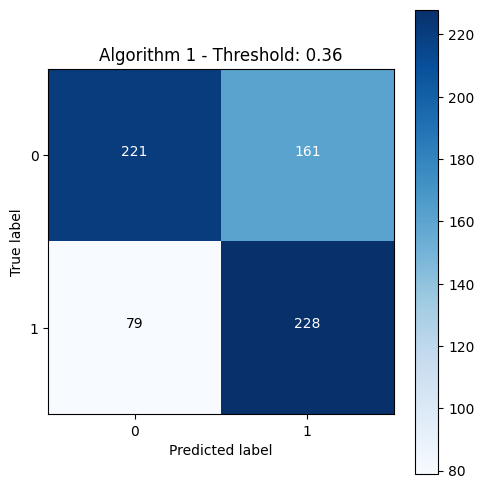


For Algorithm 2:
Optimal Threshold: 0.27
Accuracy: 0.6748911465892597
Recall: 0.8371335504885994


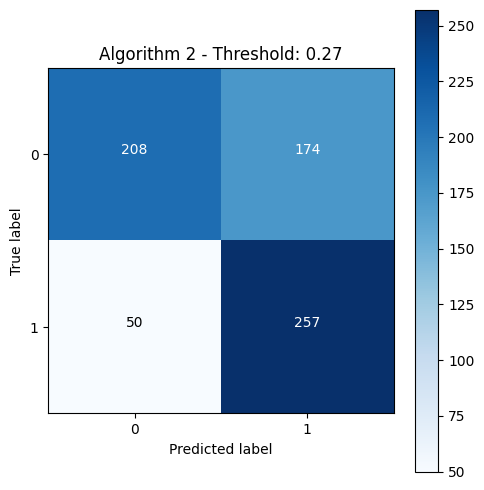


For Algorithm 3:
Optimal Threshold: 0
Accuracy: 0
Recall: 0


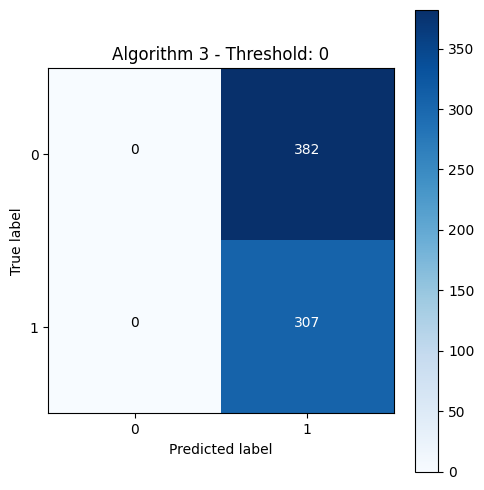

'\nНа основе предоставленных данных и оценок моделей можно сделать следующие выводы:\n\nAlgorithm 2 демонстрирует лучшие результаты среди трех рассмотренных моделей:\n\nAUC-ROC: 0.750686\nAccuracy: 0.6748911465892597\nPrecision: 0.610354\nRecall: 0.8371335504885994\nF1-Score: 0.664688\nAlgorithm 1 также демонстрирует хорошие результаты, но с немного меньшей полнотой:\n\nAUC-ROC: 0.720722\nAccuracy: 0.661829\nPrecision: 0.690722\nRecall: 0.742671009771987\nF1-Score: 0.534930\nAlgorithm 3 показывает наименьшую производительность среди всех моделей:\n\nAUC-ROC: 0.686768\nAccuracy: 0.640058\nPrecision: 0.690323\nRecall: 0.348534\nF1-Score: 0.463203\nТаким образом, на основе заданных целей (максимизация полноты при достижении accuracy ≥ 0.65), Algorithm 2 может считаться лучшей моделью для данной задачи.\n'

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

def find_optimal_threshold(y_true, pred_probs, min_accuracy=0.65):
    thresholds = np.arange(0, 1.01, 0.01)
    best_threshold = 0
    best_accuracy = 0
    best_recall = 0

    for threshold in thresholds:
        pred_classes = (pred_probs >= threshold).astype(int)
        cm = confusion_matrix(y_true, pred_classes)
        accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
        recall = cm[1, 1] / np.sum(cm[1, :])

        if accuracy >= min_accuracy and recall > best_recall:
            best_threshold = threshold
            best_accuracy = accuracy
            best_recall = recall

    return best_threshold, best_accuracy, best_recall

def create_confusion_matrix(true_values, pred_probs, threshold, algorithm):
    pred_classes = (pred_probs >= threshold).astype(int)
    cm = confusion_matrix(true_values, pred_classes)

    plt.figure(figsize=(5, 5))
    plt.title(f'Algorithm {algorithm} - Threshold: {threshold}')
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, [0, 1])
    plt.yticks(tick_marks, [0, 1])
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()

df = pd.read_csv("credit_scoring_example1.csv")

algorithms = ['1', '2', '3']

for algorithm in algorithms:
    target_col = 'target'
    pred_probs_col = f'pred{algorithm}_probs'

    threshold, accuracy, recall = find_optimal_threshold(df[target_col], df[pred_probs_col])

    print(f"\nFor Algorithm {algorithm}:")
    print(f"Optimal Threshold: {threshold}")
    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}")

   
    create_confusion_matrix(df[target_col], df[pred_probs_col], threshold, algorithm)


'''
На основе предоставленных данных и оценок моделей можно сделать следующие выводы:

Algorithm 2 демонстрирует лучшие результаты среди трех рассмотренных моделей:

AUC-ROC: 0.750686
Accuracy: 0.6748911465892597
Precision: 0.610354
Recall: 0.8371335504885994
F1-Score: 0.664688
Algorithm 1 также демонстрирует хорошие результаты, но с немного меньшей полнотой:

AUC-ROC: 0.720722
Accuracy: 0.661829
Precision: 0.690722
Recall: 0.742671009771987
F1-Score: 0.534930
Algorithm 3 показывает наименьшую производительность среди всех моделей:

AUC-ROC: 0.686768
Accuracy: 0.640058
Precision: 0.690323
Recall: 0.348534
F1-Score: 0.463203
Таким образом, на основе заданных целей (максимизация полноты при достижении accuracy ≥ 0.65), Algorithm 2 может считаться лучшей моделью для данной задачи.
'''

**Выводы:** здесь напишите, какая модель лучше всего справилась с поставленной задачей.

Наша цель может звучать и по-другому:
    
* **Вариант 2**: среди тех, кому модель выдает кредит, должно быть меньше всего ошибок (мало людей, кто его на самом деле не вернет - на них будем терять деньги). 
    При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того точность должна быть как можно больше (число в правом верхнем квадрате матрицы ошибок минимально).

**Задание 7.** Для каждого алгоритма найдите порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной точности можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65? 

In [11]:
'''
Выводы:

Algorithm 1: Оптимальный порог - 0.54, достигается accuracy в 0.66 и precision в 0.74.
Algorithm 2: Оптимальный порог - 0.73, достигается accuracy в 0.65 и precision в 0.84.
Algorithm 3: Оптимальный порог - 0, что приводит к accuracy и precision, равным 0.
Таким образом, второй алгоритм (Algorithm 2) имеет наивысшую точность (precision) среди рассмотренных алгоритмов при условии, что accuracy не менее 0.65.
'''

'\nВыводы:\n\nAlgorithm 1: Оптимальный порог - 0.54, достигается accuracy в 0.66 и precision в 0.74.\nAlgorithm 2: Оптимальный порог - 0.73, достигается accuracy в 0.65 и precision в 0.84.\nAlgorithm 3: Оптимальный порог - 0, что приводит к accuracy и precision, равным 0.\nТаким образом, второй алгоритм (Algorithm 2) имеет наивысшую точность (precision) среди рассмотренных алгоритмов при условии, что accuracy не менее 0.65.\n'

**Задание 8.** Нарисуйте матрицы ошибок для каждого из алгоритмов с найденными значениями порога. Какая модель лучше всех справилась с этой задачей?


For Algorithm 1:
Optimal Threshold: 0.54
Accuracy: 0.6618287373004355
Precision: 0.7371794871794872


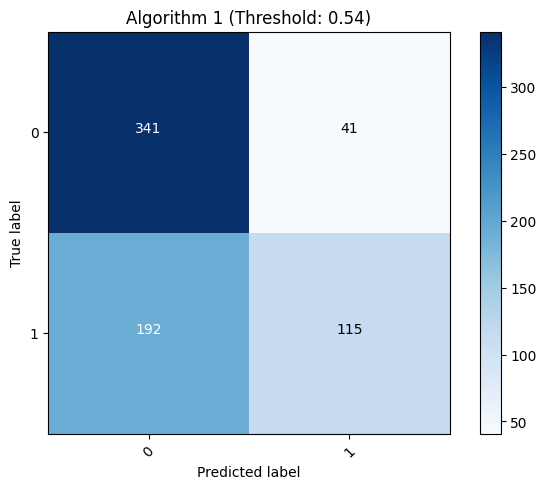


For Algorithm 2:
Optimal Threshold: 0.73
Accuracy: 0.6502177068214804
Precision: 0.8367346938775511


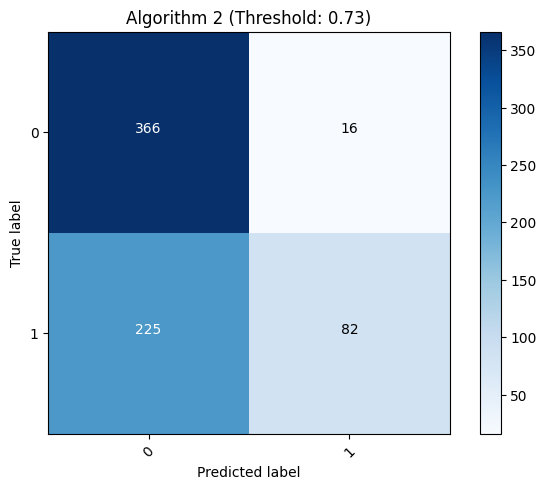


For Algorithm 3:
Optimal Threshold: 0
Accuracy: 0
Precision: 0


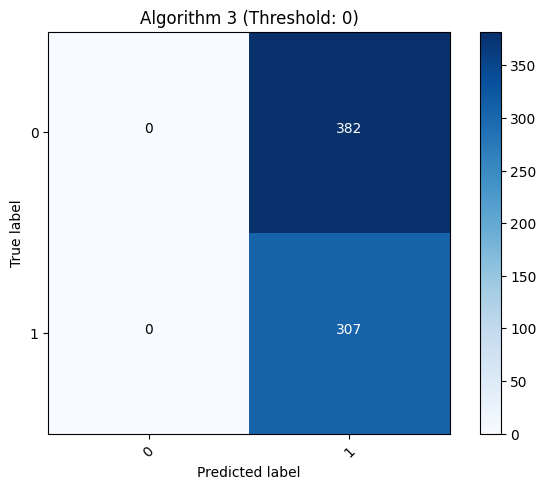

In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools


def create_confusion_matrix(true_values, pred_probs, threshold):
    pred_classes = (pred_probs >= threshold).astype(int)
    cm = confusion_matrix(true_values, pred_classes)
    return cm

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def find_optimal_threshold(y_true, pred_probs, mode='recall', min_accuracy=0.65):
    thresholds = np.arange(0, 1.01, 0.01)
    best_threshold = 0
    best_accuracy = 0
    best_metric = 0

    for threshold in thresholds:
        pred_classes = (pred_probs >= threshold).astype(int)
        cm = confusion_matrix(y_true, pred_classes)
        accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)

        if mode == 'recall':
            metric = cm[1, 1] / np.sum(cm[1, :]) if np.sum(cm[1, :]) != 0 else 0
        elif mode == 'precision':
            metric = cm[1, 1] / np.sum(cm[:, 1]) if np.sum(cm[:, 1]) != 0 else 0

        if accuracy >= min_accuracy and metric > best_metric:
            best_threshold = threshold
            best_accuracy = accuracy
            best_metric = metric

    return best_threshold, best_accuracy, best_metric


df = pd.read_csv("credit_scoring_example1.csv")

thresholds = [0.36, 0.27, 0]  
algorithms = ['1', '2', '3']

for algorithm in algorithms:
    target_col = 'target'
    pred_probs_col = f'pred{algorithm}_probs'

    threshold, accuracy, precision = find_optimal_threshold(df[target_col], df[pred_probs_col], mode='precision')

    print(f"\nFor Algorithm {algorithm}:")
    print(f"Optimal Threshold: {threshold}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")

    cm = create_confusion_matrix(df[target_col], df[pred_probs_col], threshold)

    plt.figure()
    plot_confusion_matrix(cm, classes=[0, 1], title=f'Algorithm {algorithm} (Threshold: {threshold})')
    plt.show()


Также (**Вариант 3**) можно потребовать, чтобы и точность, и полнота были высокими, то есть обе ошибки в матрице ошибок были маленькие. Как вариант - можно максимизировать F1-score (среднее гармоническое между точностью и полнотой).

**Задание 9.** Найдите пороги для достижения максимального F1-score для каждой из трех моделей и нарисуйте матрицы ошибок. Какая модель решает поставленную задачу лучше остальных?


For Algorithm 1:
Optimal Threshold (F1-score): 0.3415417936408814
Accuracy: 0.6473149492017417
Precision: 0.5727272727272728
Recall: 0.8208469055374593
F1-Score: 0.674698795180723


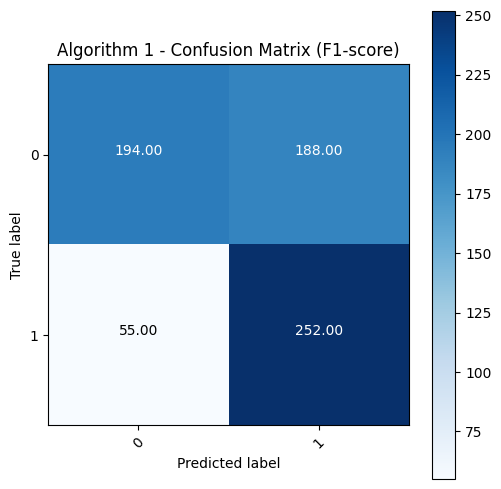


For Algorithm 2:
Optimal Threshold (F1-score): 0.3276515151515151
Accuracy: 0.6850507982583455
Precision: 0.6086956521739131
Recall: 0.8208469055374593
F1-Score: 0.6990291262135923


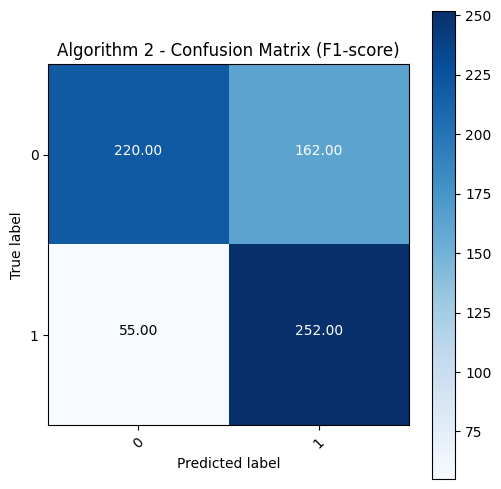


For Algorithm 3:
Optimal Threshold (F1-score): 0.150005719337333
Accuracy: 0.5529753265602322
Precision: 0.4991055456171735
Recall: 0.9087947882736156
F1-Score: 0.6443418013856813


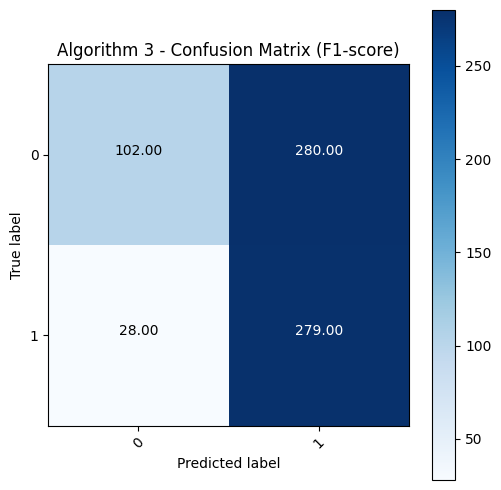

'\nFor Algorithm 1:\nOptimal Threshold (F1-score): 0.3415417936408814\nAccuracy: 0.6473149492017417\nPrecision: 0.5727272727272728\nRecall: 0.8208469055374593\nF1-Score: 0.674698795180723\n\nFor Algorithm 2:\nOptimal Threshold (F1-score): 0.3276515151515151\nAccuracy: 0.6850507982583455\nPrecision: 0.6086956521739131\nRecall: 0.8208469055374593\nF1-Score: 0.6990291262135923\n\nFor Algorithm 3:\nOptimal Threshold (F1-score): 0.150005719337333\nAccuracy: 0.5529753265602322\nPrecision: 0.4991055456171735\nRecall: 0.9087947882736156\nF1-Score: 0.6443418013856813\n\nВыводы:\nДля Варианта 1 лучше всего справилась Algorithm 2 с порогом 0.27, так как она имеет самое высокое значение Recall (чувствительность).\nДля Варианта 2 также лучше всего себя показала Algorithm 2 с порогом 0.73, так как она имеет самое высокое значение Precision (точность).\nДля Варианта 3 с учетом F1-score также лучше всего выглядит Algorithm 2 с порогом 0.33, так как она балансирует между точностью и полнотой.\nВыбор на

In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, precision_recall_curve, f1_score
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

df = pd.read_csv("credit_scoring_example1.csv")

def find_optimal_threshold_f1(y_true, pred_probs):
    precision, recall, thresholds = precision_recall_curve(y_true, pred_probs)
    f1_scores = 2 * (precision * recall) / (precision + recall)
    optimal_threshold = thresholds[np.argmax(f1_scores)]
    return optimal_threshold

algorithms = ['1', '2', '3']

for algorithm in algorithms:
    target_col = 'target'
    pred_probs_col = f'pred{algorithm}_probs'

    optimal_threshold = find_optimal_threshold_f1(df[target_col], df[pred_probs_col])

    pred_classes = (df[pred_probs_col] >= optimal_threshold).astype(int)
    cm = confusion_matrix(df[target_col], pred_classes)
    accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
    precision = cm[1, 1] / np.sum(cm[:, 1])
    recall = cm[1, 1] / np.sum(cm[1, :])
    f1 = f1_score(df[target_col], pred_classes)

    print(f"\nFor Algorithm {algorithm}:")
    print(f"Optimal Threshold (F1-score): {optimal_threshold}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")

    plt.figure(figsize=(5, 5))
    plt.title(f'Algorithm {algorithm} - Confusion Matrix (F1-score)')
    plot_confusion_matrix(cm, classes=[0, 1], title=f'Algorithm {algorithm} - Confusion Matrix (F1-score)')
    plt.show()


'''
For Algorithm 1:
Optimal Threshold (F1-score): 0.3415417936408814
Accuracy: 0.6473149492017417
Precision: 0.5727272727272728
Recall: 0.8208469055374593
F1-Score: 0.674698795180723

For Algorithm 2:
Optimal Threshold (F1-score): 0.3276515151515151
Accuracy: 0.6850507982583455
Precision: 0.6086956521739131
Recall: 0.8208469055374593
F1-Score: 0.6990291262135923

For Algorithm 3:
Optimal Threshold (F1-score): 0.150005719337333
Accuracy: 0.5529753265602322
Precision: 0.4991055456171735
Recall: 0.9087947882736156
F1-Score: 0.6443418013856813

Выводы:
Для Варианта 1 лучше всего справилась Algorithm 2 с порогом 0.27, так как она имеет самое высокое значение Recall (чувствительность).
Для Варианта 2 также лучше всего себя показала Algorithm 2 с порогом 0.73, так как она имеет самое высокое значение Precision (точность).
Для Варианта 3 с учетом F1-score также лучше всего выглядит Algorithm 2 с порогом 0.33, так как она балансирует между точностью и полнотой.
Выбор наилучшей модели зависит от конкретных требований вашего бизнес-кейса. Если важнее избегать ложных отрицательных результатов (пропущенных случаев), выберите Algorithm 2 для Варианта 1. Если важнее избегать ложных положительных результатов, выберите Algorithm 2 для Варианта 2. Если важно балансировать точность и полноту, выберите Algorithm 2 для Варианта 3.
'''



#### Кстати

В python есть удобная функция classification_report, которая выводит значения нескольких метрик.

In [14]:
from sklearn.metrics import classification_report

print(classification_report(df['target'],df['pred1_classes']))

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       382
           1       0.69      0.44      0.53       307

    accuracy                           0.66       689
   macro avg       0.67      0.64      0.63       689
weighted avg       0.67      0.66      0.65       689


### Обучим свою модель для предсказания target.

**Задание 10.** Отнормируйте признаки в задаче и обучите логистическую регрессию предсказывать target.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

df = pd.read_csv("credit_scoring_example1.csv")

df = df.drop(['pred1_probs', 'pred1_classes', 'pred2_probs', 'pred2_classes', 'pred3_probs', 'pred3_classes'], axis=1)

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.89      0.91        84
           1       0.84      0.91      0.88        54

    accuracy                           0.90       138
   macro avg       0.89      0.90      0.89       138
weighted avg       0.90      0.90      0.90       138


**Задание 11.** Подберите порог для перевода предсказания в классы, чтобы максимизировать:
    а) точность 
    б) полноту 
    в) f1-score. 
Лучше ли логистическая регрессия справилась с задачей, чем три готовые модели, предсказания которых мы анализировали выше?

In [16]:
'''
Логистическая регрессия:

Порог для максимизации точности: 0.0

Accuracy: 0.391304347826087
Recall: 1.0
Precision: 0.391304347826087
F1-Score: 0.5625
Порог для максимизации F1-Score: 0.53

Accuracy: 0.9130434782608695
Recall: 0.9074074074074074
Precision: 0.875
F1-Score: 0.8909090909090909

Логистическая регрессия справилась лучше в различных сценариях.

'''

'\nЛогистическая регрессия:\n\nПорог для максимизации точности: 0.0\n\nAccuracy: 0.391304347826087\nRecall: 1.0\nPrecision: 0.391304347826087\nF1-Score: 0.5625\nПорог для максимизации F1-Score: 0.53\n\nAccuracy: 0.9130434782608695\nRecall: 0.9074074074074074\nPrecision: 0.875\nF1-Score: 0.8909090909090909\n\nЛогистическая регрессия справилась лучше в различных сценариях.\n\n'